In [1]:
sample_size=5000
p=20
p1=10
k=10 # 这里k是变化的
M=5000

In [2]:
import numpy as np
def get_X(p,sample_size):
    X=[]
    for i in range(sample_size):
        x=np.random.randn(p)
        x=np.random.normal(0,0.2,p)
        x=list(x)
        x.append(1)
        X.append(x)
    return np.array(X)

In [3]:
X=get_X(p,sample_size)
print(X.shape)#(101,20)的矩阵

(5000, 21)


In [4]:
def get_beta(p,p1):
    beta=[]
    for i in range(p+1):
        if i<p1:
            beta.append(1)
        else:
            beta.append(0)
    return np.transpose(beta)

In [5]:
beta=get_beta(p,2)
beta=np.array(beta)#(20,1)维的向量

In [6]:
def get_y_vector(X,beta,sample_size):
    y_vector=np.dot(X,beta)+np.random.normal(0,3,sample_size)
    return y_vector

In [7]:
def get_y_vector_real(X,beta,sample_size):
    y_vector_real=np.dot(X,beta)
    return y_vector_real

In [8]:
y_vector=get_y_vector(X,beta,sample_size)
# y_vector.shape
y_vector_real=get_y_vector_real(X,beta,sample_size)
y_vector_real.shape

(5000,)

In [9]:
#求最小二乘估计
def get_beta_hat_k(k,y_vector,X,p):
    X_k=X[:,:k]
    X_k_trans=np.transpose(X_k)
    tmpdot=np.dot(X_k_trans,X_k)
    tmpinverse=np.linalg.inv(tmpdot)
    tmpdot_=np.dot(tmpinverse,X_k_trans)
    beta_hat_k=np.dot(tmpdot_,y_vector)
    beta_hat_k_vector=[]
    for i in range(p+1):
        if i < len(beta_hat_k):
            beta_hat_k_vector.append(beta_hat_k[i])
        else:
            beta_hat_k_vector.append(0)
    return beta_hat_k_vector

In [10]:
beta_hat_k=get_beta_hat_k(10,y_vector,X,p)

In [11]:
def get_y_hat_k(k,X_test,y_vector):
    beta_hat_k=get_beta_hat_k(k,y_vector,X,p)
    y_hat_vector=np.dot(X_test,beta_hat_k)
    return y_hat_vector

In [12]:
y_hat_vector=get_y_hat_k(10,X,y_vector)

In [13]:
y_hat_vector.shape

(5000,)

In [14]:
def one_iter(p,sample_size,k):
    #这里k是自变量的维度，也是p1的大小。
    # 得到训练集X
    X=get_X(p,sample_size)
    X_test=get_X(p,sample_size)
    # print("矩阵X的形状为，",X.shape)#(101,20) i.e. (samleSize,p+1)维的矩阵
    beta=get_beta(p,k)# 这里的p1就是k
    beta=np.array(beta)#(20,1)维的向量
    # 由X计算得到y
    y_vector=get_y_vector(X,beta,sample_size)
    y_vector_test=get_y_vector(X_test,beta,sample_size)
    # 由X计算得到y的真实(真实beta不加误差拟合出)
    y_vector_real_test=get_y_vector_real(X,beta,sample_size)
    # y_vector_real=get_y_vector_real(X,beta,sample_size)
    # print("向量y的形状为，",y_vector_real.shape)
    # 由训练集的X和y得到beta的最小二乘估计
    # 这里X和y_vector都是训练集中的数据
    beta_hat_k=get_beta_hat_k(k,y_vector,X,p)
    # 由最小二乘估计得到y_hat
    y_hat_vector=get_y_hat_k(k,X_test,y_vector)
    return y_hat_vector,y_vector_real_test

In [15]:
y_hat_vector,y_vector_real=one_iter(p,sample_size,k)

In [16]:
def M_iter(M):
    for i in range(M):
        y_hat_vector,y_vector_real=one_iter(p,sample_size,k)

In [17]:
def get_bias(y_hat_vector,y_vector_real):
    bias=0
    y_hat_vector_mean=np.mean(y_hat_vector)
    for y in y_vector_real:
        bias=bias+(y_hat_vector_mean-y)**2
    return bias

In [18]:
def get_var(y_hat_vector):
    var=0
    y_hat_vector_mean=np.mean(y_hat_vector)
    for y in y_hat_vector:
        var=var+(y-y_hat_vector_mean)**2
    return var/len(y_hat_vector)

In [19]:
def get_mse(y_hat_vector,y_vector_real):
    mse=0
    for i,j in zip(y_hat_vector,y_vector_real):
        mse=mse+(i-j)**2
    return mse/len(y_hat_vector)

In [20]:
bias=get_bias(y_hat_vector,y_vector_real)
bias

2014.237460218039

In [21]:
var=get_var(y_hat_vector)
var

0.013270189603460995

In [22]:
mse=get_mse(y_hat_vector,y_vector_real)
mse

0.4132908563849023

In [23]:
bias_list=[]
var_list=[]
mse_list=[]
for k in range(1,p+2):
    y_hat_vector,y_vector_real=one_iter(p,sample_size,k)
    bias=get_bias(y_hat_vector,y_vector_real)
    var=get_var(y_hat_vector)
    mse=get_mse(y_hat_vector,y_vector_real)
    bias_list.append(bias)
    var_list.append(var)
    mse_list.append(mse)

In [24]:
p=np.linspace(1,21,21)
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

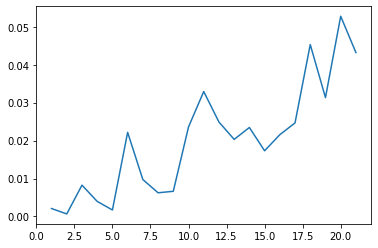

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# plt.plot(p,bias_list)
plt.plot(p,var_list)
# plt.plot(p,mse_list)
plt.legend
plt.show()